In [1]:
import tensorflow as tf
import pathlib
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

## Create a basic model of the form y = mx + c

In [9]:
# Create a simple Keras model.

x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

model.compile(optimizer="sgd", loss='mean_squared_error')
model.fit(x, y, epochs=200, verbose=1)

Epoch 1/200
1/1 [==============================] - 0s 1ms/step - loss: 3.4978
Epoch 2/200
1/1 [==============================] - 0s 3ms/step - loss: 2.9128
Epoch 3/200
1/1 [==============================] - 0s 2ms/step - loss: 2.4494
Epoch 4/200
1/1 [==============================] - 0s 2ms/step - loss: 2.0815
Epoch 5/200
1/1 [==============================] - 0s 2ms/step - loss: 1.7889
Epoch 6/200
1/1 [==============================] - 0s 2ms/step - loss: 1.5555
Epoch 7/200
1/1 [==============================] - 0s 3ms/step - loss: 1.3689
Epoch 8/200
1/1 [==============================] - 0s 1ms/step - loss: 1.2191
Epoch 9/200
1/1 [==============================] - 0s 2ms/step - loss: 1.0984
Epoch 10/200
1/1 [==============================] - 0s 1ms/step - loss: 1.0005
Epoch 11/200
1/1 [==============================] - 0s 2ms/step - loss: 0.9207
Epoch 12/200
1/1 [==============================] - 0s 2ms/step - loss: 0.8552
Epoch 13/200
1/1 [==============================] - 0s 6ms/st

## Generate a SavedModel

In [10]:
export_dir = './saved_model/1'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: ./saved_model/1/assets
INFO:tensorflow:Assets written to: ./saved_model/1/assets


## Convert the SavedModel to TFLite

In [11]:
# convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

# save the converted model to .tflite format
tflite_model_file = pathlib.Path('./saved_model/1/model.tflite')
tflite_model_file.write_bytes(tflite_model)

780

## Initialize the TFLite interpreter to try it out

In [12]:
# load TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [13]:
# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
inputs, outputs = [], []

for _ in range(100):
    input_data = np.array(np.random.random_sample(input_shape),dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    tflite_result = interpreter.get_tensor(output_details[0]['index'])

    # Test the TensorFlow model on random input data.
    tflite_result = model(tf.constant(input_data))
    output_data = np.array(tflite_result)

    inputs.append(input_data[0][0])
    outputs.append(output_data[0][0])

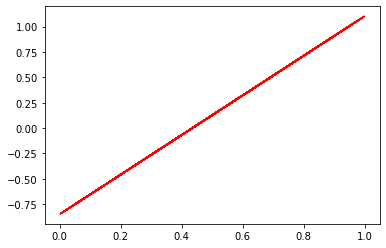

In [14]:
plt.plot(inputs, outputs, 'r')
plt.show()